In [0]:
""" 
author:-aam35

"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import tensorflow as tf
tf.enable_eager_execution()
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow.contrib.eager as tfe
from tensorflow.examples.tutorials.mnist import input_data

import timeit

tf.executing_eagerly()
# Define paramaters for the model
learning_rate = 0.001
batch_size = 100
n_epochs = 20
n_train = 55000
n_test = 10000

In [0]:

train, val, test = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/',one_hot=True,)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [0]:
img, label = train.next_batch(batch_size)

In [0]:
w = tf.Variable(tf.random_normal([train.images.shape[1],train.labels.shape[1]],stddev=0.01))
b = tf.Variable(tf.zeros([1 , train.labels.shape[1]],dtype=tf.float32))


In [0]:
def model(x):
  logits = tf.matmul(x,w) + b
  return logits

In [0]:
#evaluate the loss

variables=[w,b]
def loss(model, img, label):
  prediction = model(img)
  return tf.losses.softmax_cross_entropy(label, logits=prediction)

#record the gradient with respect to the model variables 
def grad(model, img, label):
  with tf.GradientTape() as tape:
    loss_value = loss(model, img, label)
  return tape.gradient(loss_value, variables)




  

In [0]:

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
n_bacth=train.images.shape[0]//batch_size

In [0]:
traiin=list()
vali = list()
start = timeit.default_timer()
for i in range(n_epochs):
  for j in range(n_bacth):
    img , label=train.next_batch(batch_size)
    grads=grad(model,img,label)
    optimizer.apply_gradients(zip(grads,variables),global_step=tf.train.get_or_create_global_step())
  input_data = train.images 
  label_value=train.labels
  preds = tf.nn.softmax(model(input_data))
  correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(label_value, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
  traiin.append(accuracy)
  input_data = val.images 
  label_value=val.labels
  preds = tf.nn.softmax(model(input_data))
  correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(label_value, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
  vali.append(accuracy)

stop = timeit.default_timer()

In [0]:
print(f'the whole thing took {stop-start}')

the whole thing took 48.34108138599959


<function matplotlib.pyplot.show>

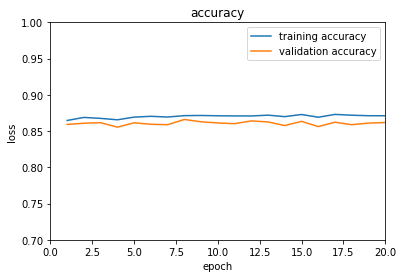

In [0]:
plt.plot([i+1 for i in range(len(traiin))], traiin,
   label="training accuracy")
plt.plot([i+1 for i in range(len(vali))], vali,
   label="validation accuracy")
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0.7, 1)
plt.xlim(0,20)
plt.legend()
plt.show

In [0]:
#train acc


input_data = train.images 
label_value=train.labels
preds = tf.nn.softmax(model(input_data))
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(label_value, 1))
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
accuracy

<tf.Tensor: id=2438141, shape=(), dtype=float32, numpy=0.8711454>

In [0]:
#test acc

input_data = test.images 
label_value=test.labels
preds = tf.nn.softmax(model(input_data))
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(label_value, 1))
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
accuracy

<tf.Tensor: id=2438125, shape=(), dtype=float32, numpy=0.8424>

In [0]:
input_data = val.images 
label_value=val.labels
preds = tf.nn.softmax(model(input_data))
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(label_value, 1))
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
accuracy

<tf.Tensor: id=2438157, shape=(), dtype=float32, numpy=0.8618>

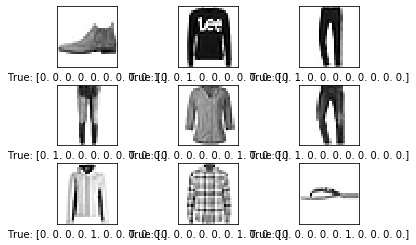

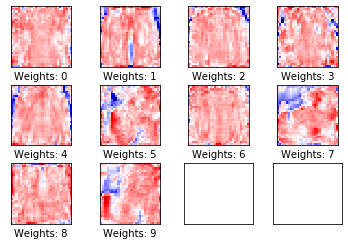

In [0]:
#Step 10: Helper function to plot images in 3*3 grid
#You can change the function based on your input pipeline

img_shape = [28,28]


def plot_images(images, y, yhat=None):
    assert len(images) == len(y) == 9
    


    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if yhat is None:
            xlabel = "True: {0}".format(y[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(y[i], yhat[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

#Get image from test set 
images = test.images[0:9]

# Get the true classes for those images.
y = test.labels[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, y=y)


#Second plot weights 
def plot_weights(w):
    # Get the values for the weights from the TensorFlow variable.
    #TO DO ####
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min =-2.248271
    #TO DO## obtains these value from W
    w_max = 1.6520177

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()


plot_weights(w.numpy())


In [0]:
import os
os.getcwd() 

'C:\\Users\\Amirreza\\Downloads'

In [0]:
weight = w
weight = weight.numpy()
from sklearn.cluster import KMeans

for class1
for class2
for class3
for class4
for class5
for class6
for class7
for class8
for class9
for class10


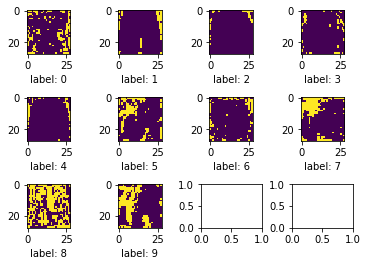

In [0]:
fig, axes = plt.subplots(3, 4)
fig.subplots_adjust(hspace=1, wspace=0.5)
for i, ax in enumerate(axes.flat):
    if i<10:
        a = weight[:,i]
        a = a.reshape(-1, 1)
        kmean = KMeans(n_clusters=2, random_state=0).fit(a)
        W = list()
        for j in kmean.labels_:
            if j == 1:
                W.append(255)
            else:
                W.append(0)
        W = np.asarray(W)
        print(f'for class{i+1}')
        ax.imshow(W.reshape(28,28))
        ax.set_xlabel("label: {0}".format(i))
plt.show()

for class1
for class2
for class3
for class4
for class5
for class6
for class7
for class8
for class9
for class10


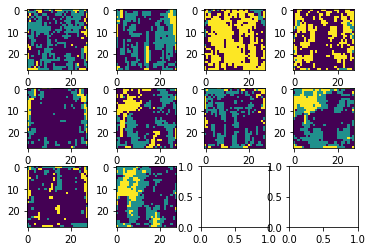

In [0]:
fig, axes = plt.subplots(3, 4)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
    if i<10:
        a = weight[:,i]
        a = a.reshape(-1, 1)
        kmean = KMeans(n_clusters=3, random_state=0).fit(a)
        W = list()
        for j in kmean.labels_:
            if j == 1:
                W.append(255)
            elif j == 2:
                W.append(128)
            else:
                W.append(0)
        W = np.asarray(W)
        print(f'for class{i+1}')
        ax.imshow(W.reshape(28,28))
plt.show()